In [44]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import rand_score, adjusted_rand_score
from sklearn import datasets, metrics

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Training/Data Science - Chegg Certificate/Capstones/Capstone 4 - Final/CC GENERAL.csv')



This is Credit Card data for 8950 customers over 6 months. The company would like to understand their customers so they can market appropriately.

# Data Cleaning

In [18]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [20]:
df_clean = df.copy()

#dropping Cust_id as it is just an identifier
df_clean = df_clean.drop(columns = ['CUST_ID'])

#remove any nulls from purchases_frequency as it will be the target.
df_clean = df_clean[df_clean['PURCHASES_FREQUENCY'].isnull().values == False]

# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

# Remove duplicate columns
df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]


In [21]:
#check % of data that is missig
df_clean.isnull().sum()*100/df_clean.isnull().count()

,0
BALANCE,0.000000
BALANCE_FREQUENCY,0.000000
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000
CASH_ADVANCE_FREQUENCY,0.000000


Data missing is less that 5% of the data.

I will get the mean to fill in those nulls

In [22]:
df_clean['CREDIT_LIMIT'].fillna(df_clean['CREDIT_LIMIT'].mean(), inplace=True)
df_clean['MINIMUM_PAYMENTS'].fillna(df_clean['MINIMUM_PAYMENTS'].mean(), inplace=True)

<ipython-input-22-2460397ac595>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['CREDIT_LIMIT'].fillna(df_clean['CREDIT_LIMIT'].mean(), inplace=True)
<ipython-input-22-2460397ac595>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Detect Outliers

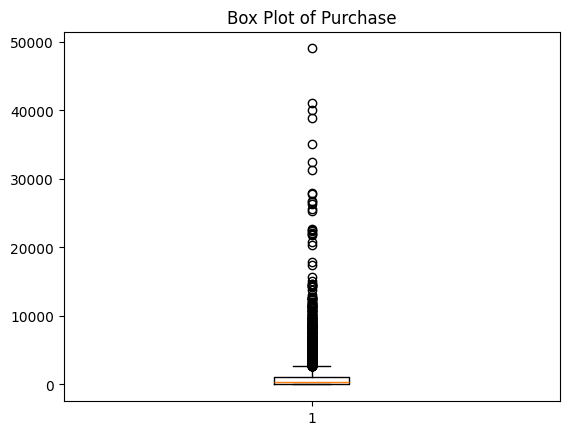

In [24]:
plt.boxplot(df_clean['PURCHASES'])
plt.title("Box Plot of Purchase")
plt.show()

Going to remove outliers of anything above 1750 purchases.

This is how we are dealing with the outliers

In [25]:
# Filter out rows where 'PURCHASES' is above 1750
df_clean = df_clean[df_clean['PURCHASES'] <= 1750]


In [26]:
# NumPy's `percentile()` method returns the
# values of the given percentiles. In this case,
# give `75` and `25` as parameters, which corresponds
# to the third and the first quartiles.
q75, q25 = np.percentile(df_clean['PURCHASES'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df_clean['PURCHASES'] > max_val)
                      | (df_clean['PURCHASES'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 536
The score threshold is: 1.5
Number of outliers is: 141
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


Doesn't appear that the target has outliers

# Exploring the Data

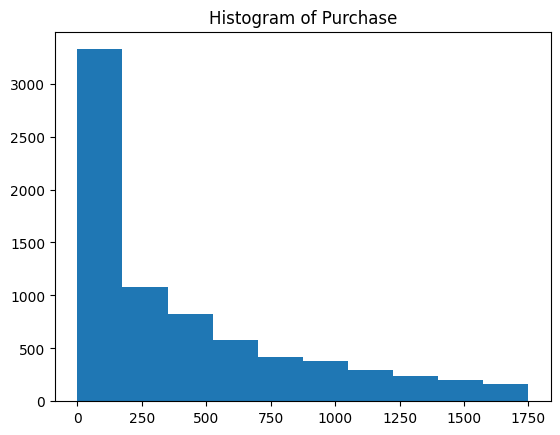

In [27]:
plt.hist(df_clean['PURCHASES'])
plt.title('Histogram of Purchase')
plt.show()

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7502 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           7502 non-null   float64
 1   BALANCE_FREQUENCY                 7502 non-null   float64
 2   PURCHASES                         7502 non-null   float64
 3   ONEOFF_PURCHASES                  7502 non-null   float64
 4   INSTALLMENTS_PURCHASES            7502 non-null   float64
 5   CASH_ADVANCE                      7502 non-null   float64
 6   PURCHASES_FREQUENCY               7502 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        7502 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  7502 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            7502 non-null   float64
 10  CASH_ADVANCE_TRX                  7502 non-null   int64  
 11  PURCHASES_TRX                     7502 non-null   int64  
 12  CREDIT_LIMI

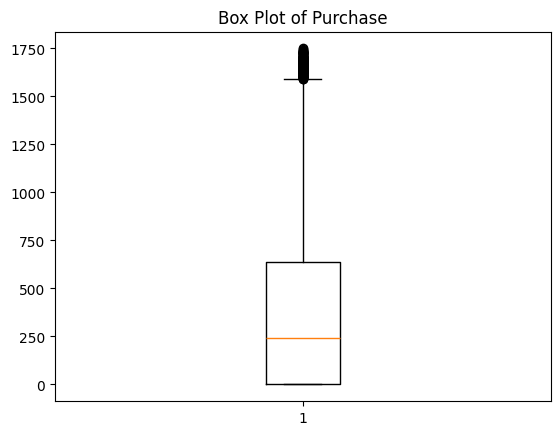

In [29]:
plt.boxplot(df_clean['PURCHASES'])
plt.title("Box Plot of Purchase")
plt.show()

I didn't get much information from this as it seems to be distributed uniformily.

In [30]:
#Correlation Matrcies
df_clean.corr()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.342010,-0.055318,0.015404,-0.096393,0.566442,-0.183850,-0.010839,-0.171794,0.511824,0.428893,-0.065555,0.531553,0.338082,0.360806,-0.315573,0.071228
BALANCE_FREQUENCY,0.342010,1.000000,0.129998,0.074041,0.104894,0.120938,0.168661,0.141006,0.122214,0.227009,0.163796,0.168237,0.054943,0.026557,0.119635,-0.139966,0.103640
PURCHASES,-0.055318,0.129998,1.000000,0.717805,0.646284,-0.143256,0.621304,0.509380,0.450099,-0.209980,-0.139134,0.645391,0.123139,0.057403,-0.009492,0.176010,0.076031
ONEOFF_PURCHASES,0.015404,0.074041,0.717805,1.000000,-0.067099,-0.058287,0.219519,0.702757,-0.088098,-0.079952,-0.054903,0.298050,0.152376,0.070483,-0.034409,-0.009107,0.040290
INSTALLMENTS_PURCHASES,-0.096393,0.104894,0.646284,-0.067099,1.000000,-0.141708,0.650012,-0.040108,0.741770,-0.213510,-0.139443,0.598704,0.009383,0.004878,0.023988,0.261845,0.064796
CASH_ADVANCE,0.566442,0.120938,-0.143256,-0.058287,-0.141708,1.000000,-0.239527,-0.081618,-0.205790,0.618474,0.647616,-0.149948,0.387109,0.613697,0.138094,-0.151290,-0.062892
PURCHASES_FREQUENCY,-0.183850,0.168661,0.621304,0.219519,0.650012,-0.239527,1.000000,0.376851,0.871943,-0.315276,-0.214369,0.713373,-0.022811,-0.090893,-0.030166,0.298649,0.013274
ONEOFF_PURCHASES_FREQUENCY,-0.010839,0.141006,0.509380,0.702757,-0.040108,-0.081618,0.376851,1.000000,-0.056651,-0.079435,-0.054140,0.378055,0.146032,0.019430,-0.043654,0.051822,0.036392
PURCHASES_INSTALLMENTS_FREQUENCY,-0.171794,0.122214,0.450099,-0.088098,0.741770,-0.205790,0.871943,-0.056651,1.000000,-0.280596,-0.188807,0.638622,-0.078076,-0.087754,-0.004885,0.268401,0.030053
CASH_ADVANCE_FREQUENCY,0.511824,0.227009,-0.209980,-0.079952,-0.213510,0.618474,-0.315276,-0.079435,-0.280596,1.000000,0.788382,-0.191906,0.193175,0.296048,0.106372,-0.244703,-0.126749


In [31]:
correlation_matrix = df_clean.corr()

# Filter for correlations above 0.8
high_correlations = correlation_matrix[correlation_matrix.abs() > 0.8]

# Get the feature pairs with high correlation
correlated_features = high_correlations[high_correlations != 1].stack().reset_index()
correlated_features.columns = ['feature1', 'feature2', 'correlation']

# Display the results
print(correlated_features)

                           feature1                          feature2  \
0               PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
1  PURCHASES_INSTALLMENTS_FREQUENCY               PURCHASES_FREQUENCY   

   correlation  
0     0.871943  
1     0.871943  


In [32]:
#removing Oneoff_Purchases and Purchases_installments Frequency due to the high correlation

df_clean = df_clean.drop(columns = ['PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY' ])

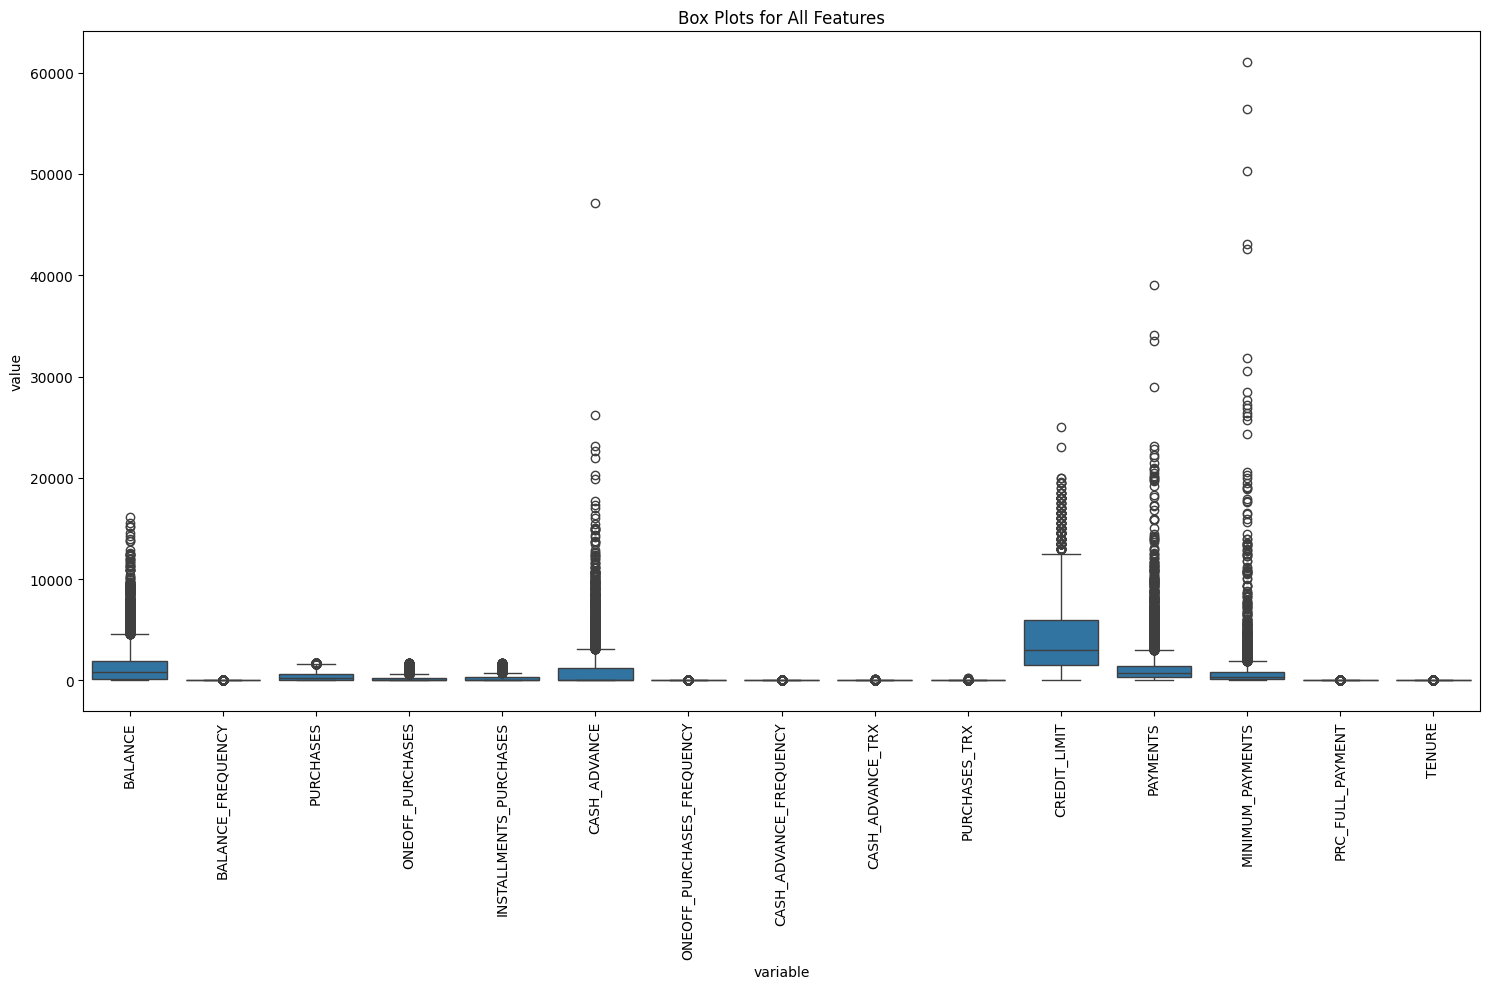

In [33]:
# Melt the DataFrame to long format for easier plotting
df_melted = pd.melt(df_clean, value_vars=df_clean.columns)

# Create the box plot
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Box Plots for All Features')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [34]:
# Create the 'Purchase_Group' column using pd.cut
df_clean['Purchase_Group'] = pd.cut(
    df_clean['PURCHASES'],
    bins=[-float('inf'), 200, 500, float('inf')],  # Define the bin edges
    labels=[0, 1, 2],  # Assign labels to the bins
    include_lowest=True  # Include the lowest value in the first bin
)



In [35]:
# Display the updated DataFrame
print(df_clean[['PURCHASES', 'Purchase_Group']].head(40))

    PURCHASES Purchase_Group
0       95.40              0
1        0.00              0
2      773.17              2
3     1499.00              2
4       16.00              0
5     1333.28              2
7      436.20              1
8      861.49              2
9     1281.60              2
10     920.12              2
11    1492.18              2
14       0.00              0
15    1611.70              2
16       0.00              0
17     519.00              2
18     504.35              2
19     398.64              1
20     176.68              0
22     815.90              2
24       0.00              0
25     399.60              1
26     102.00              0
27     233.28              1
28     387.05              1
29     100.00              0
31    1347.71              2
32     324.95              1
33     636.79              2
34     547.28              2
35       0.00              0
36       0.00              0
38     204.00              1
39     963.24              2
40       0.00 

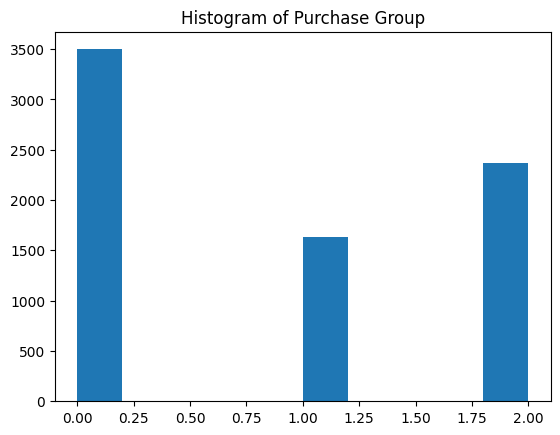

In [36]:
plt.hist(df_clean['Purchase_Group'])
plt.title('Histogram of Purchase Group')
plt.show()

In [37]:

df_clean = df_clean.drop(columns = ['PURCHASES'])

# Clustering Time

In [38]:
# Define your features (X) and target (y)
X = df_clean.drop(columns=['Purchase_Group'])  # Features: all columns except 'Purchase_Group'
y = df_clean['Purchase_Group']  # Target: 'Purchase_Group'


In [39]:

# Scaling your features if they have different scales
scaler = StandardScaler()
X_std = scaler.fit_transform(df_clean)

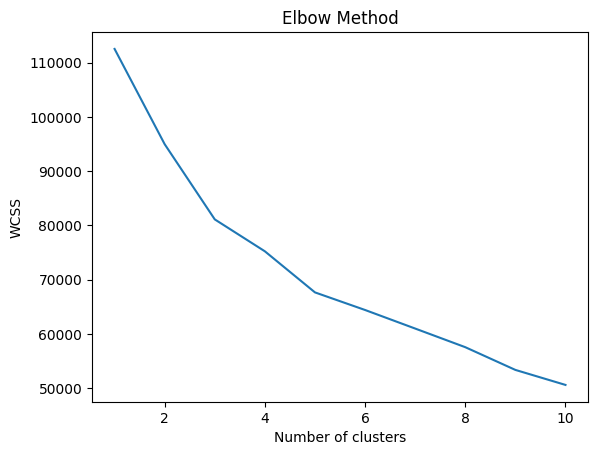

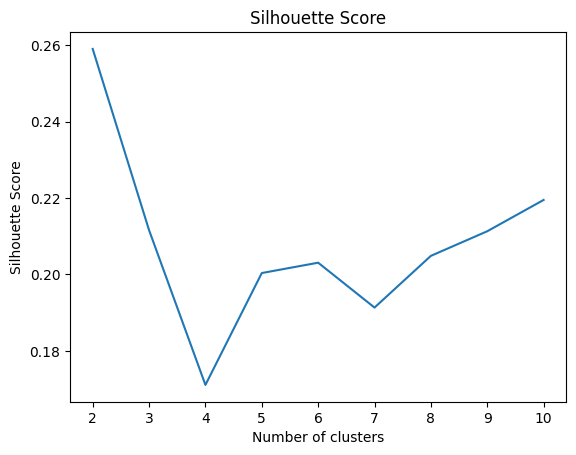

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
silhouette_scores = []
for i in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=123)
    labels = kmeans.fit_predict(X_std)
    silhouette_scores.append(silhouette_score(X_std, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

From the Elbow and Silhouette Scores I would assume we need 2 or 3 clusters

Using PCA with k-means

In [41]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_std)
df_finalresult = pd.DataFrame(df_clean)
df_finalresult['kmeans_cluster'] = clusters

inertia = kmeans.inertia_
print(f"K-Means Inertia for {optimal_k} clusters: {inertia}")
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_std)

K-Means Inertia for 2 clusters: 94970.2097184854


In [45]:
# Assuming 'clusters' contains your predicted cluster labels
# and 'y' contains your true labels

# Calculate the Rand index
rand_index = rand_score(y, clusters)

# Calculate the Adjusted Rand index
adjusted_rand_index = adjusted_rand_score(y, clusters)

# Print the results
print(f"Rand Index: {rand_index}")
print(f"Adjusted Rand Index: {adjusted_rand_index}")

Rand Index: 0.4455807207577157
Adjusted Rand Index: -0.013362104880930667


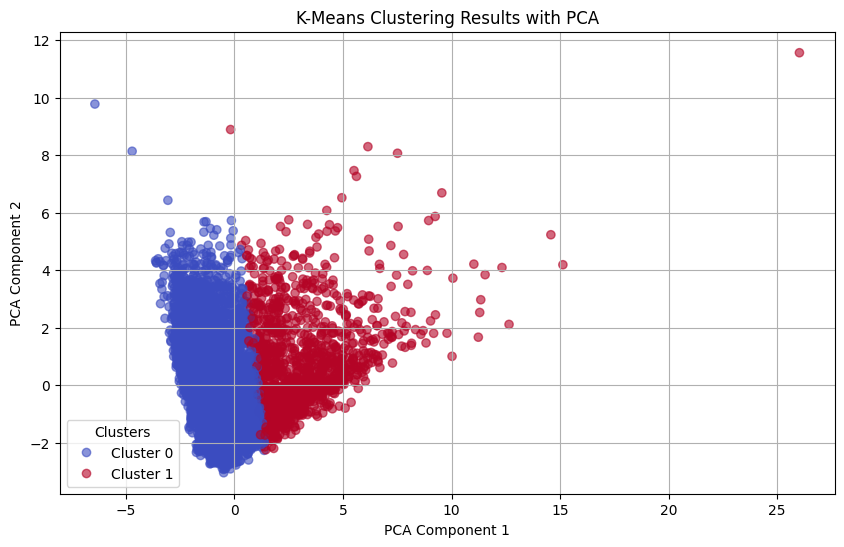

In [46]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results with PCA')
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

In [96]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_std)
df_finalresult = pd.DataFrame(df_clean)
df_finalresult['kmeans_cluster'] = clusters

inertia = kmeans.inertia_
print(f"K-Means Inertia for {optimal_k} clusters: {inertia}")
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_std)

K-Means Inertia for 3 clusters: 77444.38511308393


In [97]:
# Assuming 'clusters' contains your predicted cluster labels
# and 'y' contains your true labels

# Calculate the Rand index
rand_index = rand_score(y, clusters)

# Calculate the Adjusted Rand index
adjusted_rand_index = adjusted_rand_score(y, clusters)

# Print the results
print(f"Rand Index: {rand_index}")
print(f"Adjusted Rand Index: {adjusted_rand_index}")

Rand Index: 0.5614616886947732
Adjusted Rand Index: 0.1229491270874551


In [98]:
cluster_alignment = pd.crosstab(df_clean['Purchase_Group'], df_finalresult['kmeans_cluster'],
                                   rownames=['Purchase Group'], colnames=['Cluster'])

print(cluster_alignment)

Cluster            0     1    2
Purchase Group                 
0                 10  2688  800
1                128  1308  196
2               1142  1006  224


In [99]:
# Assuming 'kmeans' is your KMeans model and 'X' is your feature data
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame for easier interpretation
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)

# Print or visualize the cluster centers
print(cluster_centers_df)

    BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.126016           0.284461          1.666515                0.161163   
1 -0.336281          -0.167531         -0.375471                0.028740   
2  1.510965           0.388425         -0.209042               -0.286922   

   CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0     -0.334289                    1.652595               -0.367659   
1     -0.286938                   -0.368098               -0.275947   
2      1.527174                   -0.224669                1.517126   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0         -0.300596       1.021708      0.265704  0.013221         -0.064403   
1         -0.260030      -0.177334     -0.311968 -0.240269         -0.120273   
2          1.381502      -0.344887      1.000297  0.971234          0.560688   

   PRC_FULL_PAYMENT    TENURE  
0          0.105563  0.129011  
1          0.060654 -0.02

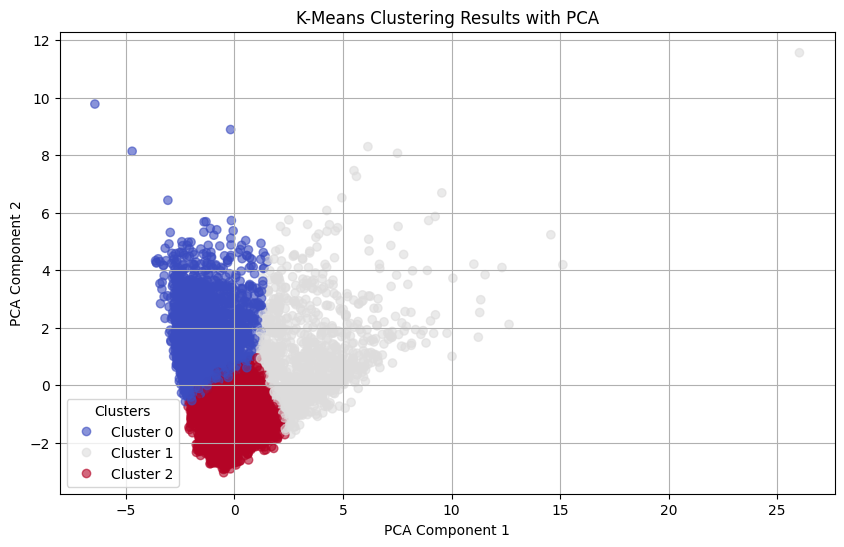

In [49]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results with PCA')
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

Using t-SNE with K-means

In [50]:
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [53]:
np.random.seed(123)

print(X.shape, y.shape)

(7502, 14) (7502,)


In [51]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [52]:
optimal_k = 3
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state = 123)
tsne_results = tsne.fit_transform(X_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7502 samples in 0.030s...
[t-SNE] Computed neighbors for 7502 samples in 1.734s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7502
[t-SNE] Computed conditional probabilities for sample 2000 / 7502
[t-SNE] Computed conditional probabilities for sample 3000 / 7502
[t-SNE] Computed conditional probabilities for sample 4000 / 7502
[t-SNE] Computed conditional probabilities for sample 5000 / 7502
[t-SNE] Computed conditional probabilities for sample 6000 / 7502
[t-SNE] Computed conditional probabilities for sample 7000 / 7502
[t-SNE] Computed conditional probabilities for sample 7502 / 7502
[t-SNE] Mean sigma: 0.484135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.236687
[t-SNE] KL divergence after 300 iterations: 2.435295
t-SNE done! Time elapsed: 48.55947422981262 seconds


In [87]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_std)

# Create df_finalresult from X instead of df to match the shape of clusters
df_finalresult = pd.DataFrame(X)  # X has the same number of rows as X_std and clusters
df_finalresult['kmeans_cluster'] = clusters

inertia = kmeans.inertia_
print(f"K-Means Inertia for {optimal_k} clusters: {inertia}")
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_std)

K-Means Inertia for 3 clusters: 77444.38511308393


In [88]:
from sklearn.metrics import adjusted_rand_score, rand_score

# Assuming 'clusters' contains your predicted cluster labels
# and 'y' contains your true labels

# Calculate the Rand index
rand_index = rand_score(y, clusters)

# Calculate the Adjusted Rand index
adjusted_rand_index = adjusted_rand_score(y, clusters)

# Print the results
print(f"Rand Index: {rand_index}")
print(f"Adjusted Rand Index: {adjusted_rand_index}")

Rand Index: 0.5614616886947732
Adjusted Rand Index: 0.1229491270874551


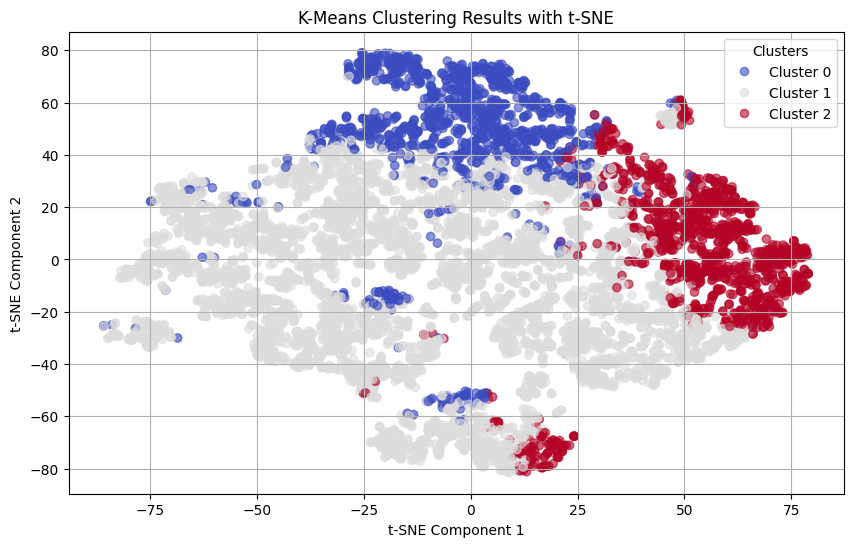

In [89]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clustering Results with t-SNE')
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

In [90]:
cluster_alignment = pd.crosstab(df_clean['Purchase_Group'], df_finalresult['kmeans_cluster'],
                                   rownames=['Purchase Group'], colnames=['Cluster'])

print(cluster_alignment)

Cluster            0     1    2
Purchase Group                 
0                 10  2688  800
1                128  1308  196
2               1142  1006  224


In [91]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_std)
df_finalresult = pd.DataFrame(df_clean)
df_finalresult['kmeans_cluster'] = clusters

inertia = kmeans.inertia_
print(f"K-Means Inertia for {optimal_k} clusters: {inertia}")
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_std)

K-Means Inertia for 2 clusters: 87729.50061337985


In [61]:
# Assuming 'clusters' contains your predicted cluster labels
# and 'y' contains your true labels

# Calculate the Rand index
rand_index = rand_score(y, clusters)

# Calculate the Adjusted Rand index
adjusted_rand_index = adjusted_rand_score(y, clusters)

# Print the results
print(f"Rand Index: {rand_index}")
print(f"Adjusted Rand Index: {adjusted_rand_index}")

Rand Index: 0.4411497110969048
Adjusted Rand Index: -0.015837903390360262


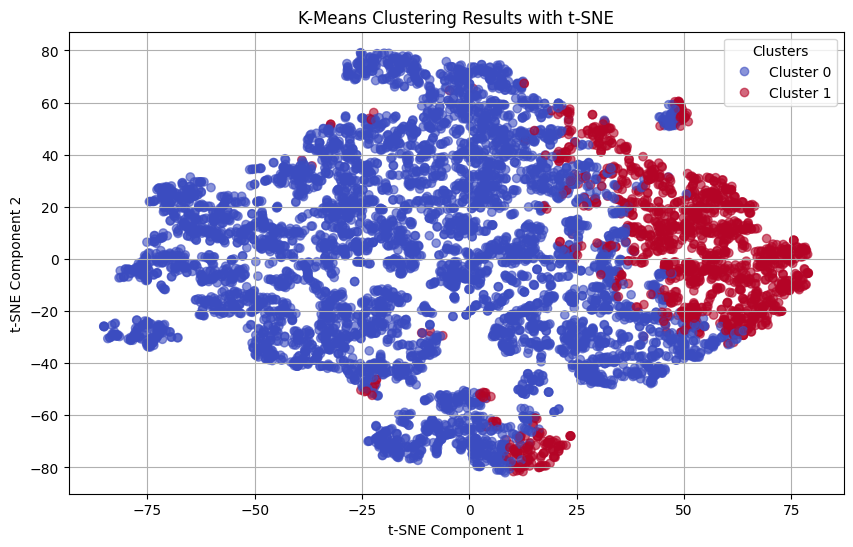

In [62]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clustering Results with t-SNE')
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

# DBScan

In [63]:
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

In [64]:
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))



Adjusted Rand Index of the DBSCAN solution: 0.09885984683845468


In [65]:
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=.5, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: 0.018816477573730526


In [66]:
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=2, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: 0.010472809226961316


Best with eps as 1

Now to adjust min sample to make it a neighbor

In [67]:
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=10)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: 0.11462857649840039


In [68]:
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=40)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: 0.10650916148678816


In [69]:
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=20)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: 0.11435297802060274


10 min sample with 1 epsilon performed best

# Hierarchical Clustering

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


In [71]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [72]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    # Try to access by index label, if it fails, use the default color
    try:
        # Reset color_index in each loop iteration to prevent value conflicts
        color_index = int(y.iloc[i]) % len(colours)
    except KeyError:
        color_index = 0 # Or any other default color index you prefer

    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[color_index],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [73]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: -5.0920322426095534e-05
The silhouette score of the Agglomerative Clustering solution: 0.807089629346504


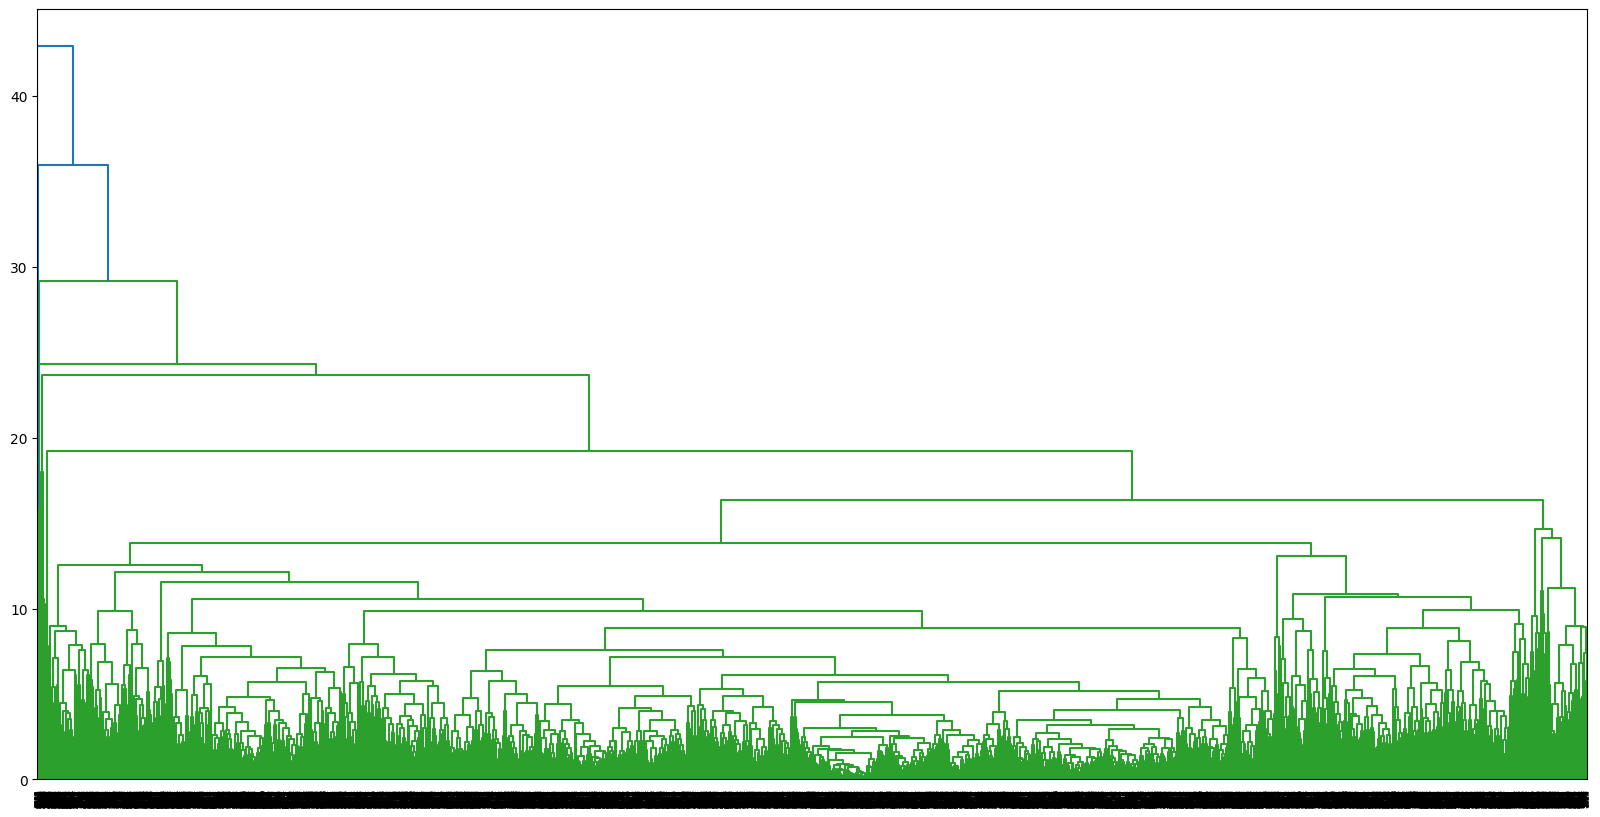

In [74]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [75]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [76]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.1598586443948573
The silhouette score of the Agglomerative Clustering solution: 0.1561672324012873


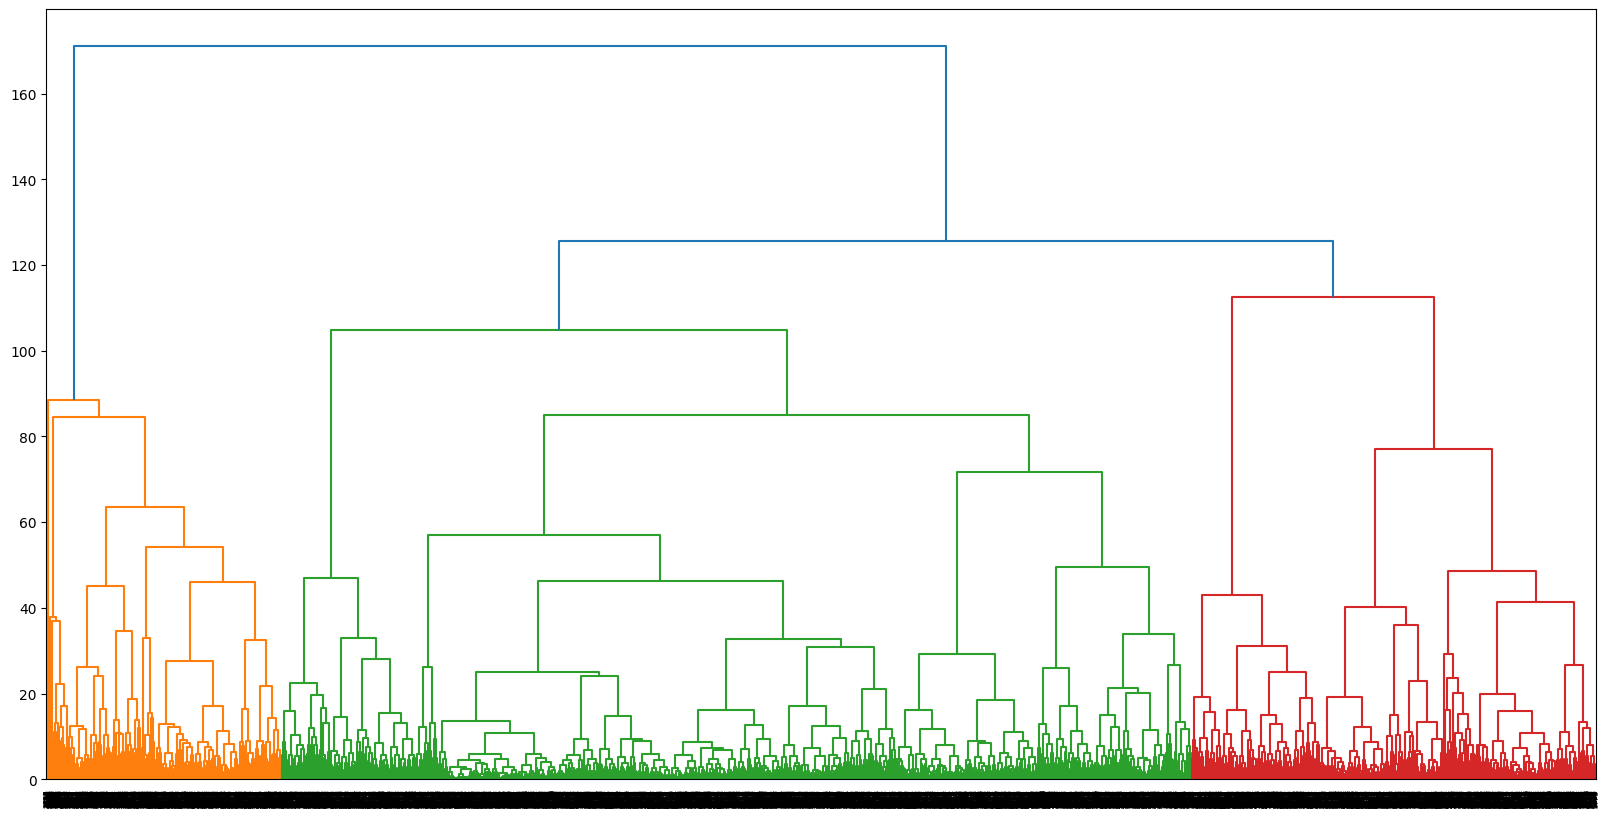

In [77]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

Ward worked best

Overall it looks like multiple attempts from k-mean, t-SNE and even Dendograms has showcased that 3 clusters is best.

DBScan did not perform very well.

This explains a lot of the natural groupings. Now that I have the 3 clusters I can see high-purchasers and common attributes in the future.


Now that we can get the clusters we can tie this to marketing and see which characteristics based on the features make up each cluster

# Understanding the features

Using the K-means clusters with optimal clusters of 3 and PCA

In [101]:

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_std)
df_finalresult = pd.DataFrame(df_clean)
df_finalresult['kmeans_cluster'] = clusters

inertia = kmeans.inertia_
print(f"K-Means Inertia for {optimal_k} clusters: {inertia}")
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_std)

# 'clusters' contains your predicted cluster labels
# and 'y' contains your true labels

# Calculate the Rand index
rand_index = rand_score(y, clusters)

# Calculate the Adjusted Rand index
adjusted_rand_index = adjusted_rand_score(y, clusters)

# Print the results
print(f"Rand Index: {rand_index}")
print(f"Adjusted Rand Index: {adjusted_rand_index}")

cluster_alignment = pd.crosstab(df_clean['Purchase_Group'], df_finalresult['kmeans_cluster'],
                                   rownames=['Purchase Group'], colnames=['Cluster'])

print(cluster_alignment)


# Assuming 'kmeans' is your KMeans model and 'X' is your feature data
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame for easier interpretation
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)

# Print or visualize the cluster centers
print(cluster_centers_df)

K-Means Inertia for 3 clusters: 77444.38511308393
Rand Index: 0.5614616886947732
Adjusted Rand Index: 0.1229491270874551
Cluster            0     1    2
Purchase Group                 
0                 10  2688  800
1                128  1308  196
2               1142  1006  224
    BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.126016           0.284461          1.666515                0.161163   
1 -0.336281          -0.167531         -0.375471                0.028740   
2  1.510965           0.388425         -0.209042               -0.286922   

   CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0     -0.334289                    1.652595               -0.367659   
1     -0.286938                   -0.368098               -0.275947   
2      1.527174                   -0.224669                1.517126   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0         -0.300596       1.021708      0.265704 

This starts to showcase basic feature elements. The higher the value the more likely it is has to do with that cluster

High Purhcasers have a more a Balance Frequency, Cash Advance, Higher Credit Limit, Use Minimum Payments more

Low Purchasers have a Balance Frequency, One Off Purchases, Instalmment Purchases, Purchases TRX, Higher Tenure

Medium Purhcasers are not stronger in any one category but from it do not have a high Balance Frequency, do not do One Off Prurcahses, Unlikely to do Cash Advance Frequency